In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from datetime import datetime
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 20})

In [27]:
data = pd.read_csv('EV_data.csv')
ID_26 = data['ID:26']
ID_370 = data['ID:370']
ID_545 = data['ID:545']
ID_661 = data['ID:661']
ID_4767 = data['ID:4767']
data.head()

localminute  ID:26  ID:370  ID:545    ID:661  ID:4767
0  1/5/2014 0:00  0.005     0.0     0.0  0.001683      0.0
1  1/5/2014 1:00  0.005     0.0     0.0  0.000000      0.0
2  1/5/2014 2:00  0.005     0.0     0.0  0.000000      0.0
3  1/5/2014 3:00  0.005     0.0     0.0  0.001583      0.0
4  1/5/2014 4:00  0.005     0.0     0.0  3.328617      0.0

In [35]:
array = np.zeros((len(data.columns[1:])*len(data), 5))
j = 0
for car_index, car in enumerate(data.columns[1:]):
    for i in range(len(data)):
        value = datetime.strptime(data['localminute'].iloc[i], '%m/%d/%Y %H:%M')
        week_of_year = int(value.strftime('%W'))
        day_of_week = int(value.strftime('%w'))
        hour_of_day = int(value.strftime('%-H'))
        array[j, :] = [car_index, week_of_year, day_of_week, hour_of_day, data[car].iloc[i]]
        j += 1
        
data_resized = pd.DataFrame(array, columns=['car_index', 'week_of_year', 'day_of_week', 'hour_of_day', 'energy_consumption'])
data_resized.head()

car_index  week_of_year  day_of_week  hour_of_day  energy_consumption
0        0.0           0.0          0.0          0.0               0.005
1        0.0           0.0          0.0          1.0               0.005
2        0.0           0.0          0.0          2.0               0.005
3        0.0           0.0          0.0          3.0               0.005
4        0.0           0.0          0.0          4.0               0.005

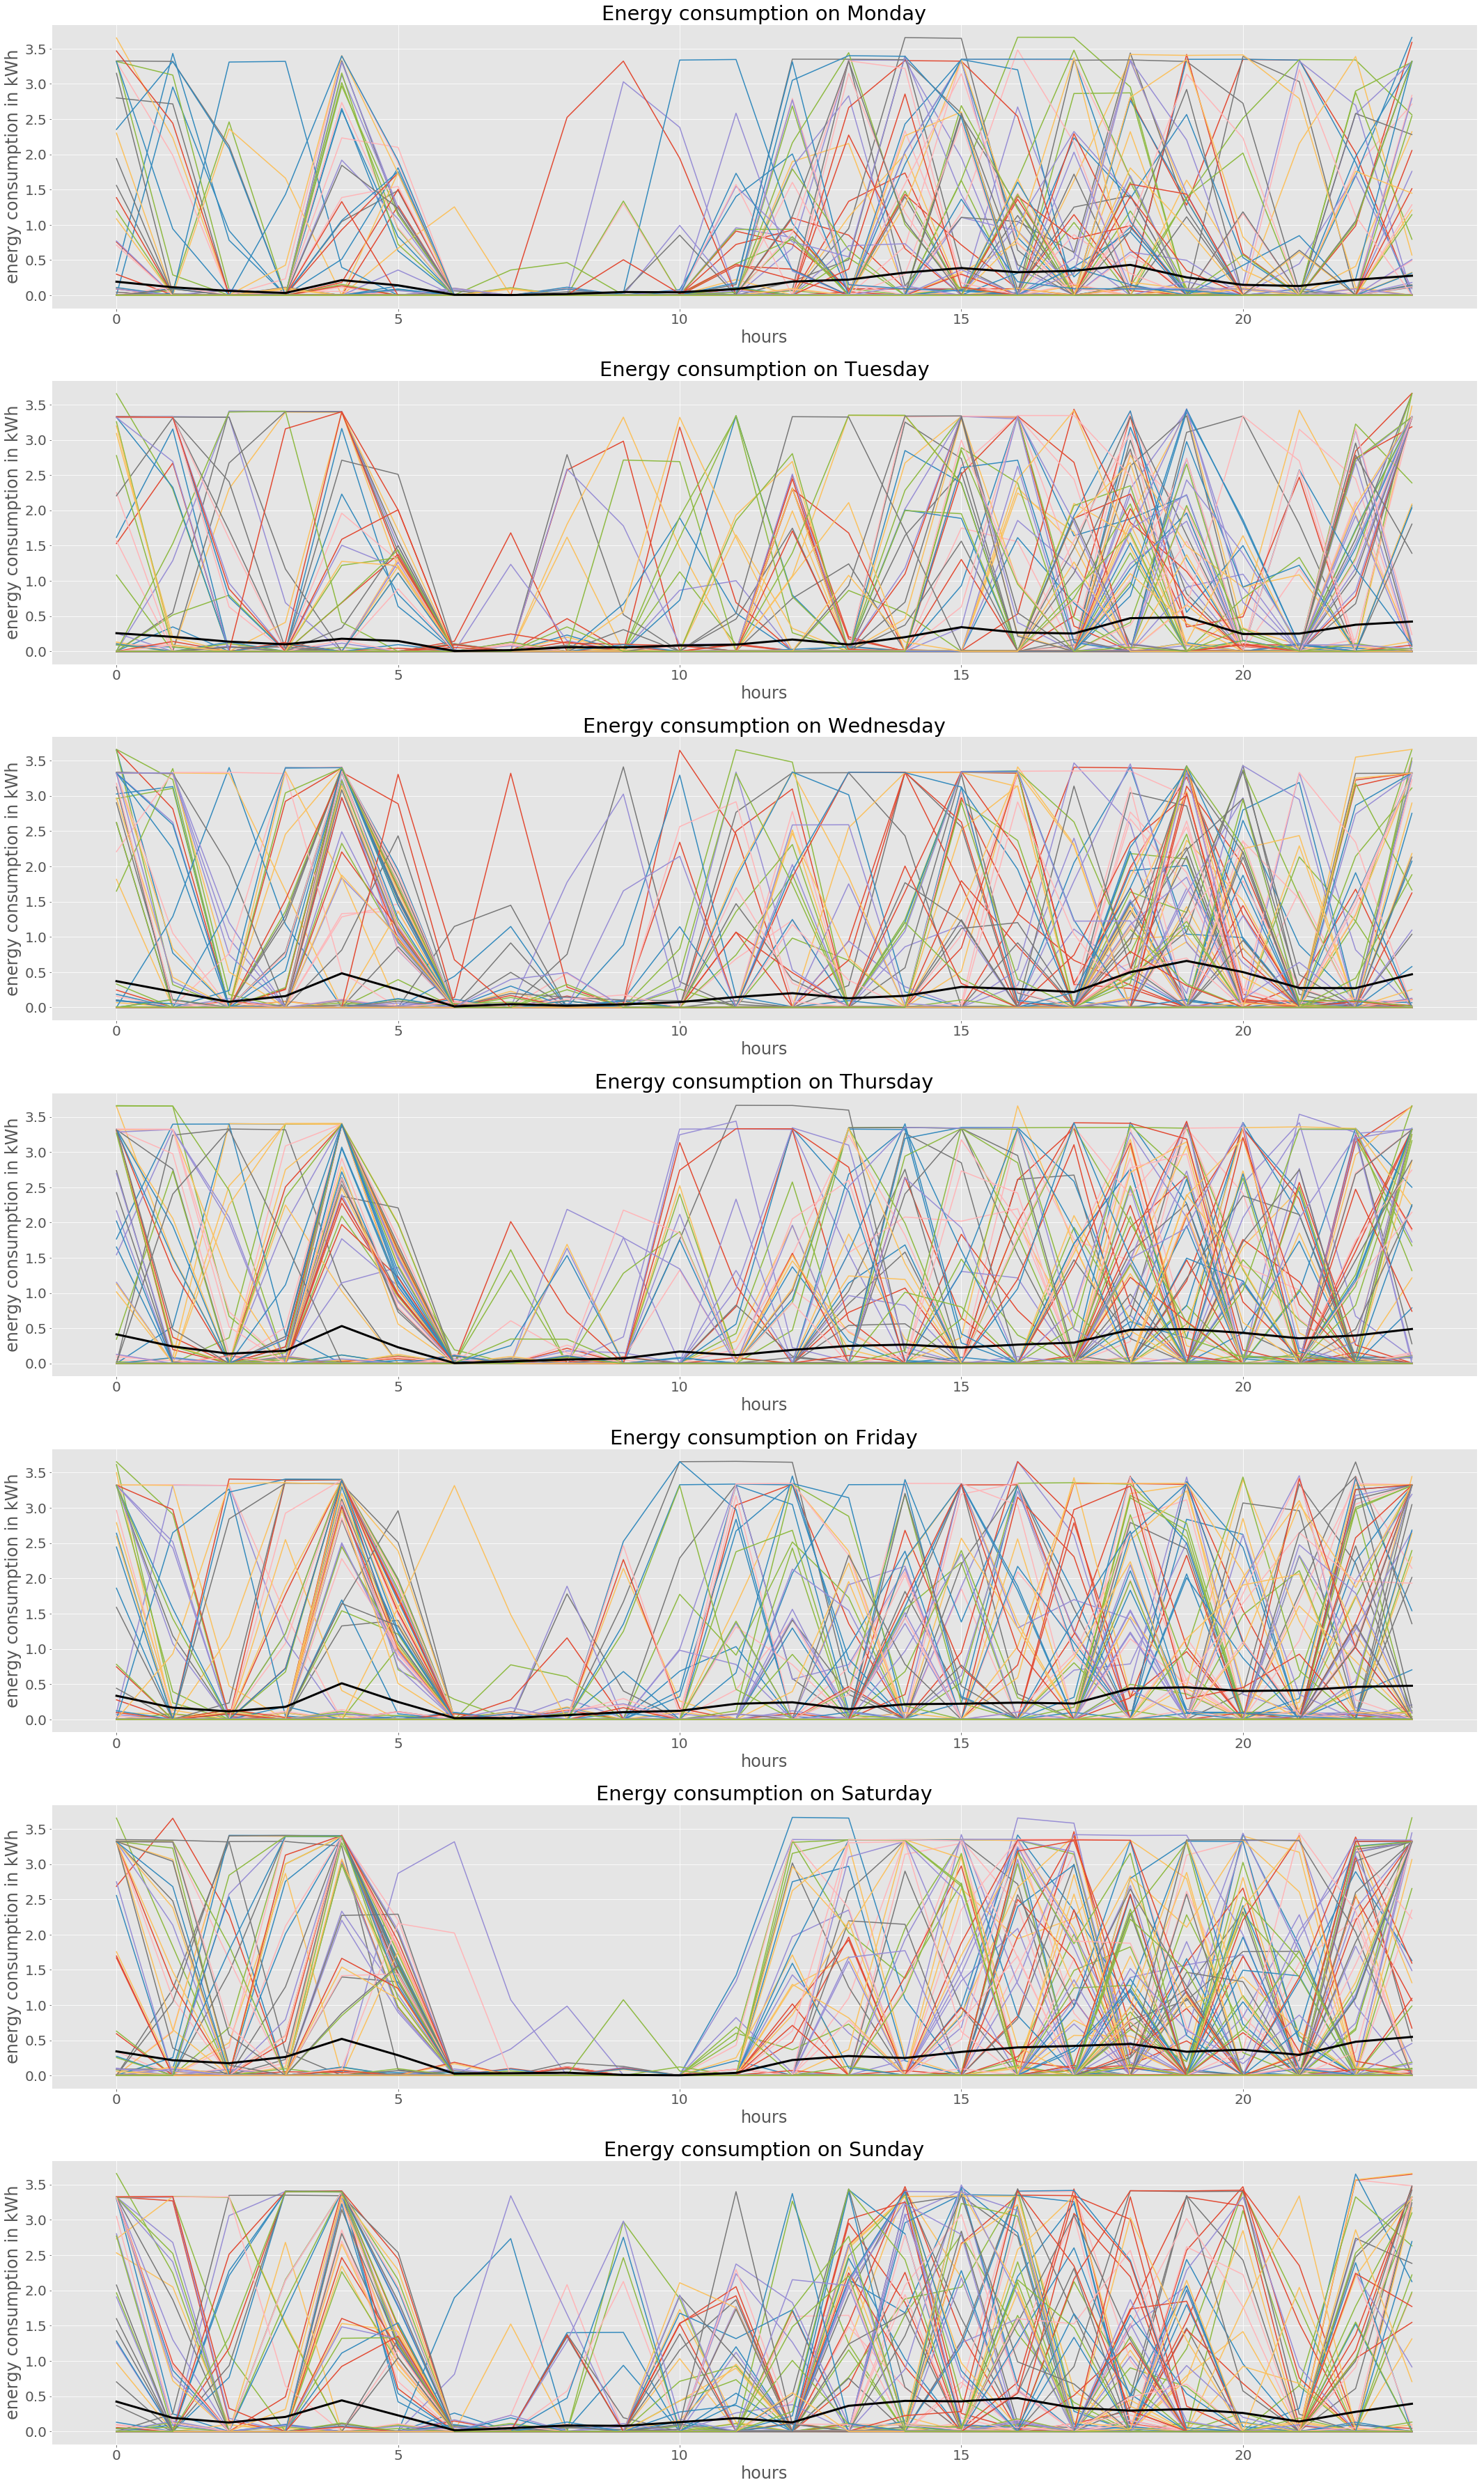

In [36]:
plt.figure(figsize=(30, 50))
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i in range(int(data_resized['day_of_week'].max())+1):
    num = 711+i
    plt.subplot(num)
    for week in range(int(data_resized['week_of_year'].max())):
        for car in range(int(data_resized['car_index'].max())):
            plt.plot(data_resized[(data_resized['day_of_week'] == i) & (data_resized['week_of_year'] == week) & (data_resized['car_index'] == car)].groupby('hour_of_day').mean()['energy_consumption'])
    plt.plot(data_resized[(data_resized['day_of_week'] == i)].groupby('hour_of_day').mean()['energy_consumption'], color='black', linestyle='-', linewidth=3)
    plt.xlabel('hours')
    plt.ylabel('energy consumption in kWh')
    plt.title('Energy consumption on '+ day_of_week[i])
    plt.tight_layout()

plt.savefig('weekly_energy_consumption.png')
plt.show()

In [43]:
presence_list = []
for element in data_resized['energy_consumption']:
    if element <= 0.01:
        presence_list.append(0)
    else:
        presence_list.append(1)
        
data_resized['presence'] = presence_list
data_resized.head()

car_index  week_of_year  day_of_week  hour_of_day  energy_consumption  \
0        0.0           0.0          0.0          0.0               0.005   
1        0.0           0.0          0.0          1.0               0.005   
2        0.0           0.0          0.0          2.0               0.005   
3        0.0           0.0          0.0          3.0               0.005   
4        0.0           0.0          0.0          4.0               0.005   

   presence  
0         0  
1         0  
2         0  
3         0  
4         0

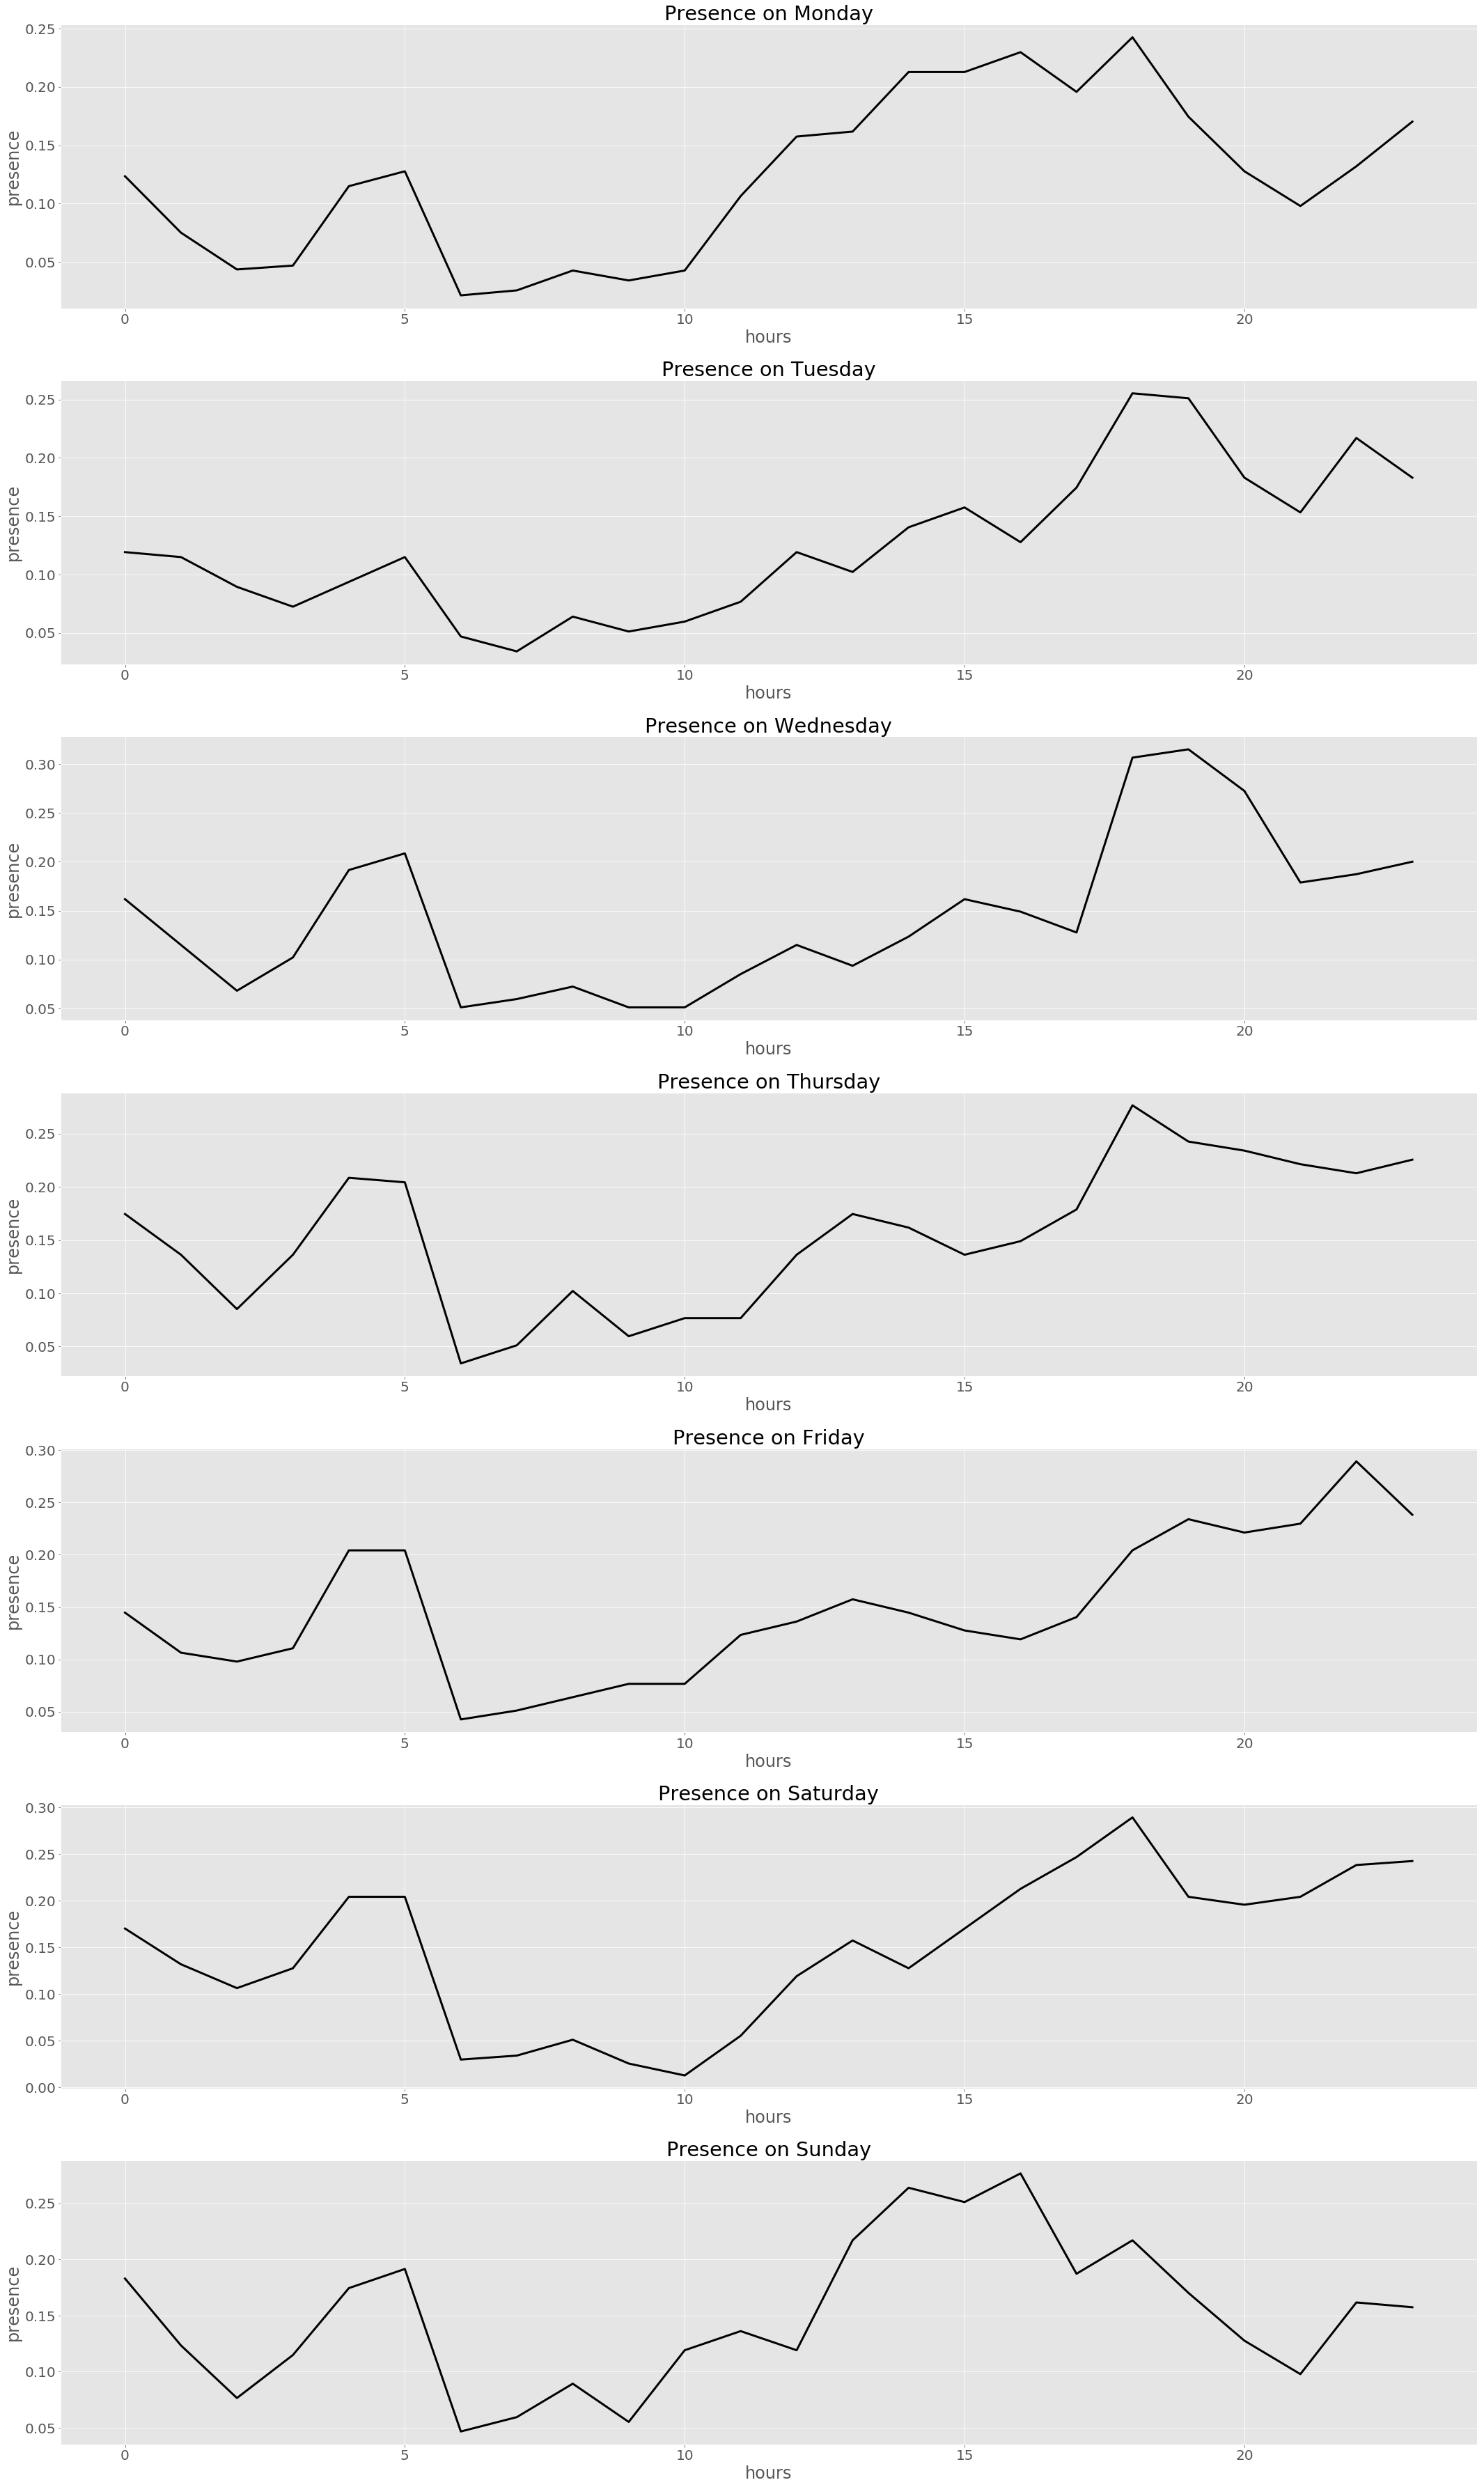

In [45]:
plt.figure(figsize=(30, 50))
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i in range(int(data_resized['day_of_week'].max())+1):
    num = 711+i
    plt.subplot(num)
    plt.plot(data_resized[(data_resized['day_of_week'] == i)].groupby('hour_of_day').mean()['presence'], color='black', linestyle='-', linewidth=3)
    plt.xlabel('hours')
    plt.ylabel('presence')
    plt.title('Presence on '+ day_of_week[i])
    plt.tight_layout()

plt.savefig('weekly_presence.png')
plt.show()

In [6]:
#Creating and resizing EV_array into (ID , Week, DOW, HOD)
ev_array = np.array([ID_26, ID_370, ID_545, ID_661, ID_4767])
ev_array.resize(5, 47, 7, 24) 

array([[[[5.00000000e-03, 5.00000000e-03, 5.00000000e-03, ...,
          5.00000000e-03, 5.00000000e-03, 5.00000000e-03],
         [5.00000000e-03, 5.00000000e-03, 5.00000000e-03, ...,
          9.17166670e-02, 6.77000000e-02, 5.00000000e-03],
         [5.00000000e-03, 5.00000000e-03, 5.00000000e-03, ...,
          5.00000000e-03, 5.00000000e-03, 5.00000000e-03],
         ...,
         [5.00000000e-03, 5.00000000e-03, 5.00000000e-03, ...,
          5.00000000e-03, 5.00000000e-03, 5.00000000e-03],
         [5.00000000e-03, 5.00000000e-03, 5.00000000e-03, ...,
          3.17045000e+00, 2.20500000e-02, 5.00000000e-03],
         [5.00000000e-03, 5.00000000e-03, 5.00000000e-03, ...,
          5.00000000e-03, 5.00000000e-03, 5.00000000e-03]],

        [[5.00000000e-03, 5.00000000e-03, 5.00000000e-03, ...,
          5.00000000e-03, 5.00000000e-03, 5.00000000e-03],
         [5.00000000e-03, 5.00000000e-03, 5.00000000e-03, ...,
          5.00000000e-03, 5.00000000e-03, 5.00000000e-03],
        

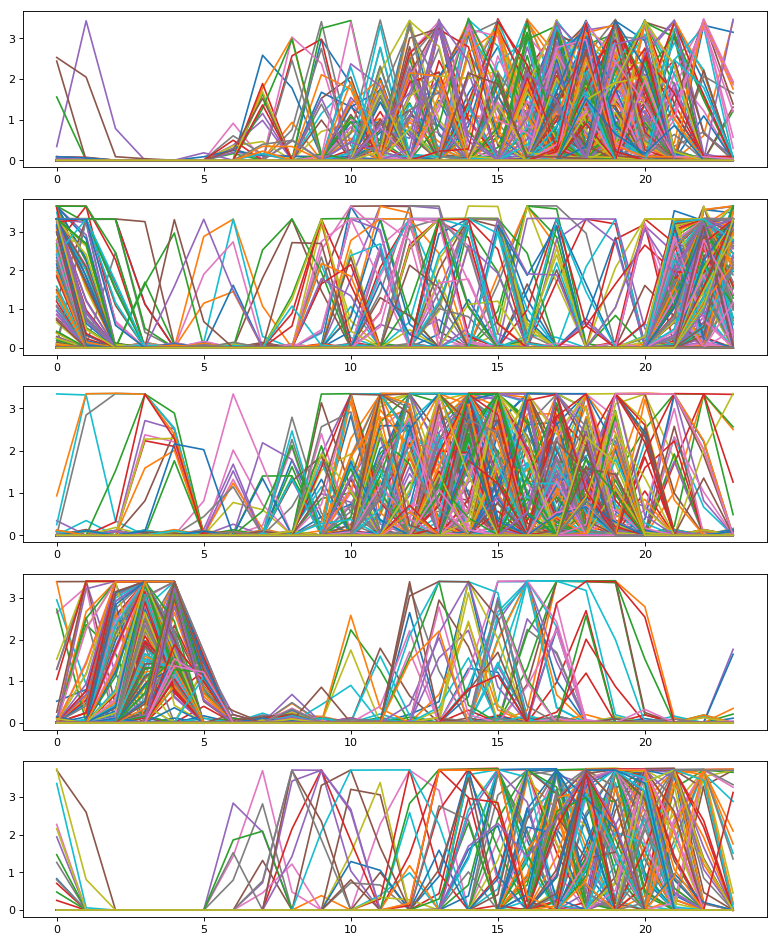

In [4]:
plt.figure(dpi = 80, figsize = (12,15))
for i in range(5):
    plt.subplot(5,1,i + 1)
    for j in range(47):
        for k in range(7):
            plt.plot(np.linspace(0, 23, 24), ev_array[i, j, k,:])

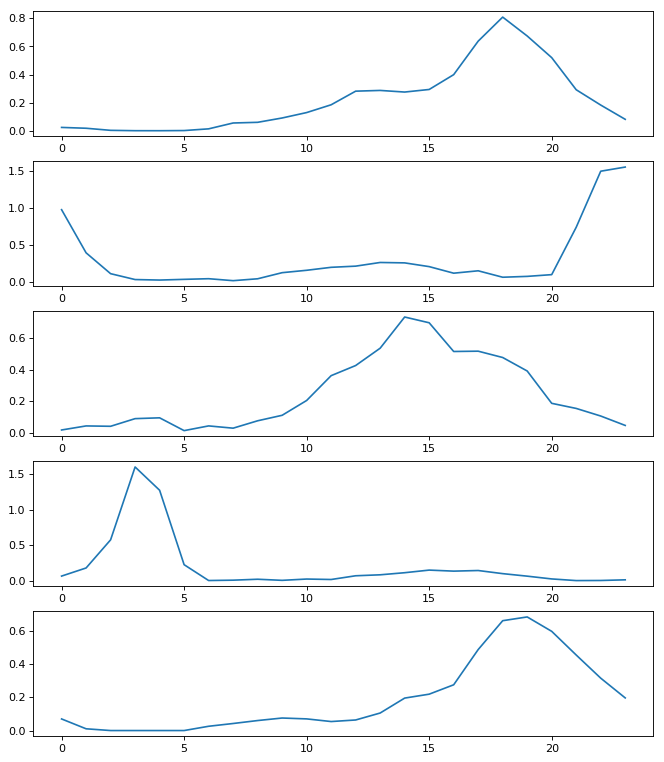

In [5]:
plt.figure(dpi = 80, figsize = (10,12))
for i in range(5):
    plt.subplot(5, 1, i+1)
    mean = []
    for j in range(24):
        mean.append(np.mean(ev_array[i,:,:,j]))
    plt.plot(np.linspace(0,23,24), mean)

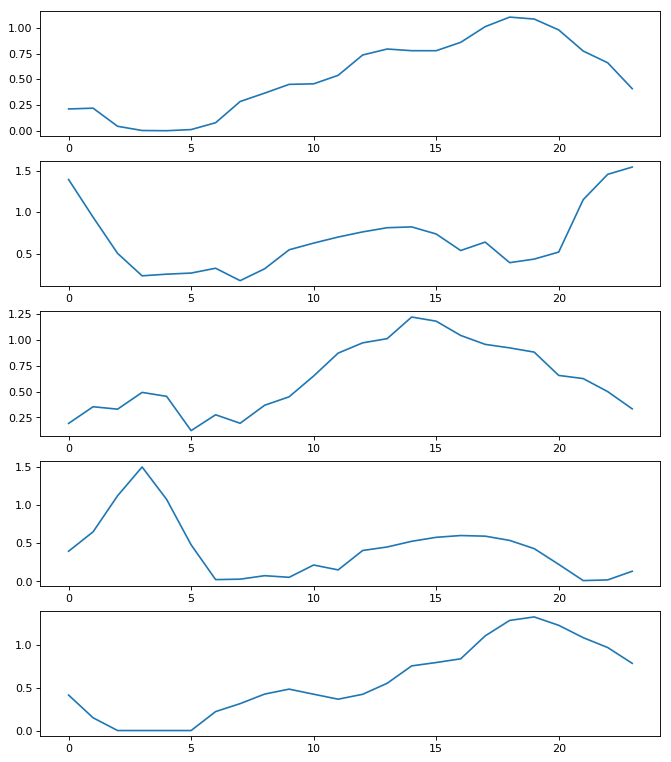

In [54]:
plt.figure(dpi = 80, figsize = (10,12))
for i in range(5):
    plt.subplot(5, 1, i+1)
    std = []
    for j in range(24):
        std.append(np.std(ev_array[i,:,:,j]))
    plt.plot(np.linspace(0,23,24), std)